# Continuous Probabilistic Methods Exercises

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [3]:
def get_lower_and_upper_bounds(s, m = 1.5):
    q1 = np.quantile(s, .25)
    q3 = np.quantile(s, .75)
    iqr = q3 - q1
    upper_bound = m * iqr + q3
    lower_bound = q1 - m * iqr
    return lower_bound, upper_bound

## Using lemonade.csv dataset and focusing on continuous variables:

### 1. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept? 

### a. Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?


    

In [4]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [5]:
print(df.shape)
df.describe()

(365, 7)


,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [6]:
for col in df.select_dtypes(['int','float']).columns.to_list():
    lower, upper = get_lower_and_upper_bounds(df[col], 1.5)
    print(f'{col} lower = {lower}.\n{col} upper = {upper}')

Temperature lower = 16.700000000000003.
Temperature upper = 104.7
Rainfall lower = 0.26.
Rainfall upper = 1.3
Flyers lower = 4.0.
Flyers upper = 76.0
Price lower = 0.5.
Price upper = 0.5
Sales lower = 5.0.
Sales upper = 45.0


The lower bounds do not make sense for rainfall or price.
Rainfall's lower bound is below the min while the price is static.
Temperature is the only applicable outlier and it's not far from the lower bound and can be kept.

The upper bounds make sense for all columns.
No outliers need to be kept

### b. Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
### c. Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [7]:
print(df.describe())

for col in df.select_dtypes(['int','float']).columns.to_list():
    lower, upper = get_lower_and_upper_bounds(df[col], 3)
    print(f'{col} lower = {lower}.\n{col} upper = {upper}')

       Temperature    Rainfall      Flyers  Price       Sales
count   365.000000  365.000000  365.000000  365.0  365.000000
mean     61.224658    0.825973   40.104110    0.5   27.865753
std      18.085892    0.273890   13.786445    0.0   30.948132
min      15.100000    0.400000  -38.000000    0.5    7.000000
25%      49.700000    0.650000   31.000000    0.5   20.000000
50%      61.100000    0.740000   39.000000    0.5   25.000000
75%      71.700000    0.910000   49.000000    0.5   30.000000
max     212.000000    2.500000   80.000000    0.5  534.000000
Temperature lower = -16.299999999999997.
Temperature upper = 137.7
Rainfall lower = -0.13.
Rainfall upper = 1.69
Flyers lower = -23.0.
Flyers upper = 103.0
Price lower = 0.5.
Price upper = 0.5
Sales lower = -10.0.
Sales upper = 60.0


The lower bounds for temperature, rainfall, flyers, price and sales do not make sense.
The min temperature does not reach the negatives and rainfall, flyers, and sales should not be negative.
No outliers should be assessed with this lower bound.

The upper bounds for all columns make sense.

### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns: Use a 2 sigma decision rule to isolate the outliers.

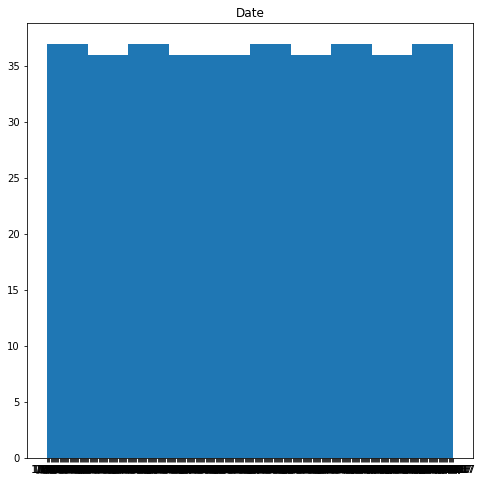

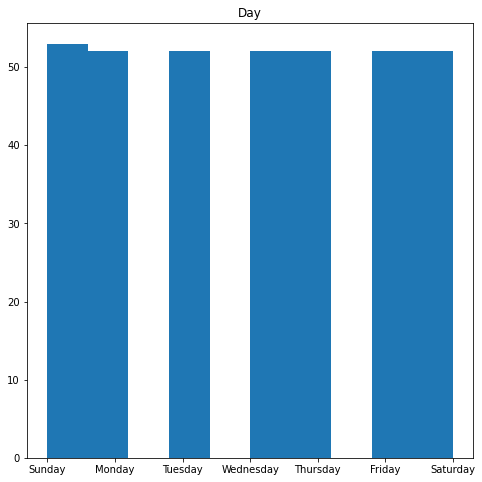

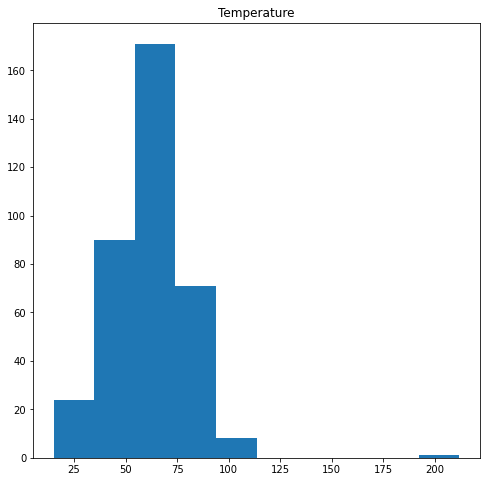

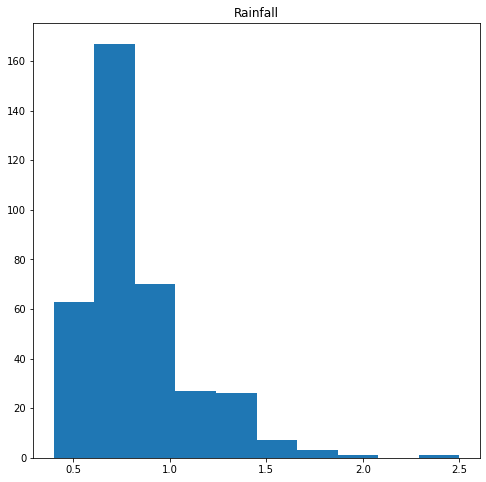

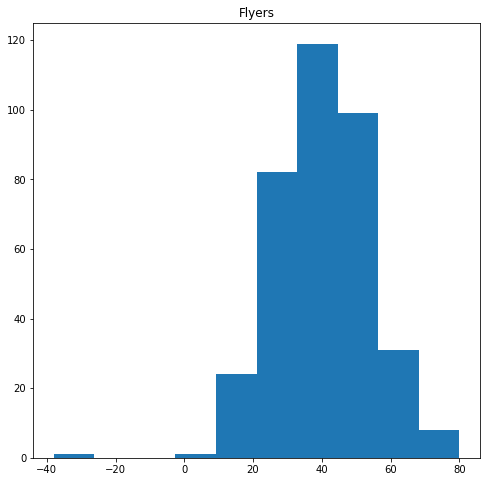

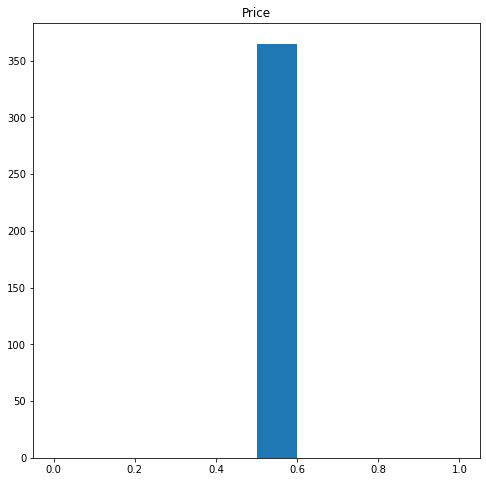

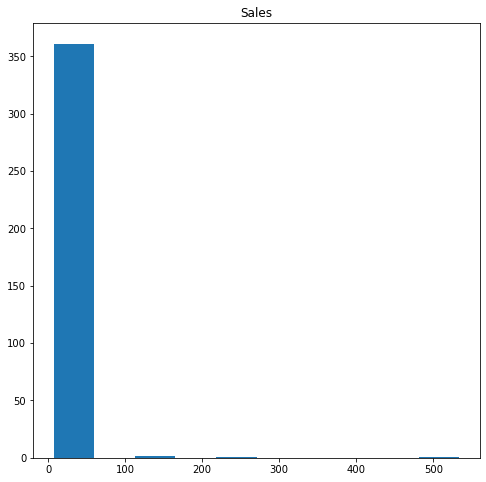

In [8]:
for col in df.columns.to_list():
    plt.figure(figsize=(8,8))
    plt.hist(df[col])
    plt.title(col)

Flyers, rainfall, and temperature look normally distributed.

In [40]:
for col in ['Flyers','Rainfall','Temperature']:
    stddev = df[col].std()
    print(f'{col} Standard Deviation: {stddev}')
    plus_two_stddev = df[col].mean() + 2*stddev
    minus_two_stddev = df[col].mean() - 2*stddev
    # two_stddev_range = range(minus_two_stddev, plus_two_stddev)

    print(f'{col} two sigma range: {minus_two_stddev} - {plus_two_stddev}')
    print(f'2 Sigma Rule: {round(df[(df[col] > minus_two_stddev) & (df[col] < plus_two_stddev)][col].count() / df[col].count() * 100)}%\n')

Flyers Standard Deviation: 13.786444592187344
Flyers two sigma range: 12.531220404666406 - 67.67699877341579
2 Sigma Rule: 96%

Rainfall Standard Deviation: 0.27389026701985425
Rainfall two sigma range: 0.27819206870001834 - 1.3737531367794353
2 Sigma Rule: 95%

Temperature Standard Deviation: 18.08589229830261
Temperature two sigma range: 25.052872937641396 - 97.39644213085184
2 Sigma Rule: 97%



In [39]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


### a. Do these make sense
They all make sense, since majority of the values are within the ranges.
        
### b. Should certain outliers be kept or removed?
I might decide to keep the flyers outliers because they're not very far from the upper bound.

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [37]:
for col in ['Flyers','Rainfall','Temperature']:
    stddev = df[col].std()
    print(f'{col} Standard Deviation: {stddev}')

    plus_three_stddev = df[col].mean() + 3*stddev
    minus_three_stddev = df[col].mean() - 3*stddev
    # three_stddev_range = range(minus_three_stddev, plus_three_stddev)

    print(f'{col} three sigma range: {minus_three_stddev} - {plus_three_stddev}')
    print(f'2 Sigma Rule: {round(df[(df[col] > minus_three_stddev) & (df[col] < plus_three_stddev)][col].count() / df[col].count() * 100)}%\n')

Flyers Standard Deviation: 13.786444592187344
Flyers three sigma range: -1.2552241875209376 - 81.46344336560313
2 Sigma Rule: 100%

Rainfall Standard Deviation: 0.27389026701985425
Rainfall three sigma range: 0.00430180168016403 - 1.6476434037992895
2 Sigma Rule: 99%

Temperature Standard Deviation: 18.08589229830261
Temperature three sigma range: 6.966980639338786 - 115.48233442915445
2 Sigma Rule: 100%

